In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ocr import *
from solver_sudoku import *
from keras.models import load_model
from keras.models import model_from_json

print("import success")

import success


# 🎯 AI Sudoku Solver
## Computer Vision & Deep Learning Project

### Overview
This project uses:
- 🖼️ Computer Vision (OpenCV)
- 🧠 Deep Learning (TensorFlow/Keras) 
- 🔢 Image Processing
- ⚡ Real-time Sudoku grid detection and solving

### Current File
Processing image: `test/test2.webp` for Sudoku grid analysis

In [29]:
# Load image
img_path = "/Users/kcsam/Desktop/github/AI-Sudoku/test/test2.webp" # Change this to the path of the image you want to test
img = cv2.imread(img_path)


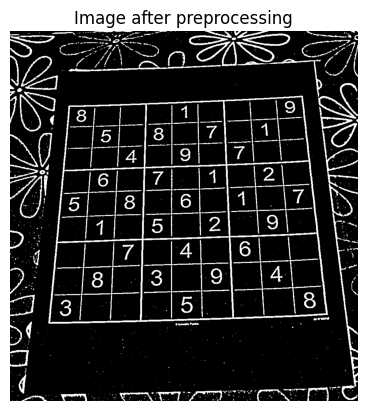

In [30]:
#preprocess image 
preprocess_img = preprocess(img)

# show image after preprocessing
plt.imshow(preprocess_img, cmap='gray')
plt.title('Image after preprocessing')
plt.axis('off')
plt.show()

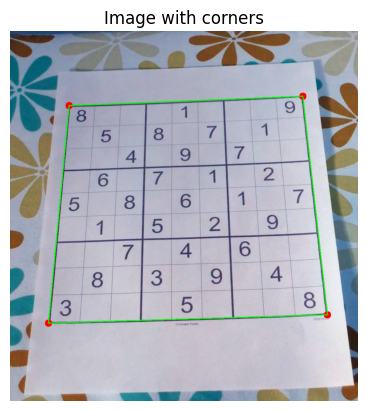

In [31]:
#Find contours
contours = get_contours(preprocess_img)

# Draw contours on the original image
for point in contours:
    x, y = point[0]
    cv2.circle(img, (x, y), radius=10, color=(255, 0, 0), thickness=-1)


# Draw lines between the corners
cv2.drawContours(img, [contours], 0, (0, 255, 0), 2)

# Show the image with the corners
plt.imshow(img)
plt.title("Image with corners")
plt.axis('off')
plt.show()

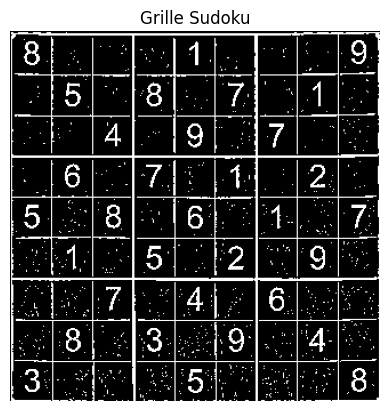

In [32]:
# Get the corners of the sudoku grid
pt1s,pts2 = get_corners(contours)

# Get the perspective image 
grille = perspective( pt1s, pts2,img)

# show the perspective image
plt.imshow(grille, cmap="gray")
plt.title("Grille Sudoku")
plt.axis('off')
plt.show()

In [33]:
# load the model
model = load_model("./digit_model.h5")

# OCR the sudoku grid
ocr_sudoku = ocr_sudoku(model,grille)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

In [ ]:
# Convert string grid to integer grid
grid = []
for row in ocr_sudoku:
    grid.append([int(num) for num in row])

# Print original grid
print("Sudoku before resolution:")
print_sudoku(grid)

# Solve the puzzle and check if solution exists
if solve(grid):
    print("\nSudoku after resolution:")
    print_sudoku(grid)
else:
    print("\nNo solution exists")

Sudoku before resolution:
8 . . | . 1 . | . . 9 
. 5 . | 8 . 7 | . 1 . 
. . 4 | . 9 . | 7 . . 
---------------------
. 6 . | 7 . 1 | . 2 . 
5 . 8 | . 6 . | 1 . 7 
. 1 . | 5 . 2 | . 9 . 
---------------------
. . 7 | . 4 . | 6 . . 
. 8 . | 3 . 9 | . 4 . 
3 . . | . 5 . | . . 8 

Sudoku after resolution:
8 7 2 | 4 1 3 | 5 6 9 
9 5 6 | 8 2 7 | 3 1 4 
1 3 4 | 6 9 5 | 7 8 2 
---------------------
4 6 9 | 7 3 1 | 8 2 5 
5 2 8 | 9 6 4 | 1 3 7 
7 1 3 | 5 8 2 | 4 9 6 
---------------------
2 9 7 | 1 4 8 | 6 5 3 
6 8 5 | 3 7 9 | 2 4 1 
3 4 1 | 2 5 6 | 9 7 8 
